In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

# Read In and Check Top and Bottom

In [4]:
nibrs = pd.read_csv('NibrsUtah.csv',na_values=[' '])
nibrs.head()

,year,incident_id,arrest_date,sex,age,age_cat,resident_code,agency_name,suburb,pop_cat,...,victim_type_name,victim_age,victim_age_cat,victim_sex,victim_race,victim_res_status,vic_off_relationship,circumstances,victim_injury,age_disc
0,2019,111548493,2019-03-04,M,27,Age in Years,R,Uintah,N,"Non-MSA counties from 10,000 thru 24,999",...,Individual,27.0,Age in Years,F,White,R,Victim Was Spouse,Lovers' Quarrel,None,22-29
1,2019,118632187,2019-03-31,M,31,Age in Years,R,Ogden,N,"Cities from 50,000 thru 99,999",...,Individual,23.0,Age in Years,M,White,NaN,Relationship Unknown,NaN,None,30-39
2,2019,111560586,2019-02-20,M,48,Age in Years,U,Salt Lake City,N,"Cities from 100,000 thru 249,999",...,Individual,29.0,Age in Years,F,White,NaN,NaN,NaN,NaN,40-49
3,2019,118633445,2019-10-23,M,41,Age in Years,N,Murray,Y,"Cities from 25,000 thru 49,999",...,Individual,20.0,Age in Years,F,Black or African American,N,NaN,NaN,NaN,40-49
4,2019,111552412,2019-03-10,M,44,Age in Years,N,Draper,Y,"Cities from 25,000 thru 49,999",...,Individual,NaN,Unknown,U,Unknown,N,NaN,NaN,NaN,40-49


In [4]:
nibrs.tail()

,year,incident_id,arrest_date,sex,age,age_cat,resident_code,agency_name,suburb,pop_cat,...,victim_type_name,victim_age,victim_age_cat,victim_sex,victim_race,victim_res_status,vic_off_relationship,circumstances,victim_injury,age_disc
256859,2019,117352433,2019-05-15,F,29,Age in Years,R,Salt Lake County Unified Police Department,Y,"MSA counties 100,000 or over",...,Individual,23.0,Age in Years,F,White,R,Relationship Unknown,NaN,Minor Injury,22-29
256860,2019,117352433,2019-05-15,F,29,Age in Years,R,Salt Lake County Unified Police Department,Y,"MSA counties 100,000 or over",...,Individual,23.0,Age in Years,F,White,R,Relationship Unknown,NaN,Minor Injury,22-29
256861,2019,119922084,2019-12-09,M,40,Age in Years,U,Box Elder,Y,"MSA counties from 10,000 thru 24,999",...,Individual,31.0,Age in Years,M,White,NaN,NaN,NaN,NaN,40-49
256862,2019,119922084,2019-12-09,M,41,Age in Years,U,Box Elder,Y,"MSA counties from 10,000 thru 24,999",...,Individual,31.0,Age in Years,M,White,NaN,NaN,NaN,NaN,40-49
256863,2019,112465123,2019-05-08,M,36,Age in Years,R,Murray,Y,"Cities from 25,000 thru 49,999",...,Individual,43.0,Age in Years,M,White,R,Victim was Otherwise Known,NaN,Minor Injury,30-39


## Check the Packaging

In [5]:
nibrs.shape

(256864, 27)

#### We are entering "Big Data" territory.

## Check The N's

In [7]:
nibrs['arrest_date'] = pd.to_datetime(nibrs['arrest_date'])
nibrs['arrest_date'].head()

0   2019-03-04
1   2019-03-31
2   2019-02-20
3   2019-10-23
4   2019-03-10
Name: arrest_date, dtype: datetime64[ns]

In [8]:
print(nibrs['arrest_date'].min())
nibrs['arrest_date'].max()

2016-01-01 00:00:00


Timestamp('2020-03-06 00:00:00')

In [9]:
nibrs['victim_type_name'].value_counts()

Individual                 256640
Law Enforcement Officer       224
Name: victim_type_name, dtype: int64

## How can we simplify Victim-Offender relationship?
Remember our discussion on creating variables and how they are measured?

In [10]:
nibrs['vic_off_relationship'].value_counts()

Relationship Unknown                                    42454
Victim Was Stranger                                     27268
Victim Was Acquaintance                                 18995
Victim Was Boyfriend/Girlfriend                         14742
Victim was Otherwise Known                              14174
Victim Was Spouse                                        9164
Victim Was Child                                         9064
Victim Was Offender                                      7701
Victim Was Other Family Member                           4798
Victim Was Parent                                        4738
Victim Was Sibling                                       4507
Victim Was Friend                                        2792
Victim Was Neighbor                                      1070
Victim Was Child of Boyfriend or Girlfriend              1014
Victim was Ex-Spouse                                      883
Victim Was Stepchild                                      840
Victim W

In [3]:
nibrs['offense_name'].value_counts()

Simple Assault                                 71254
Aggravated Assault                             25281
All Other Offenses                             15192
All Other Larceny                              13770
Stolen Property Offenses                       13127
Destruction/Damage/Vandalism of Property       12701
Drug/Narcotic Violations                       12472
Burglary/Breaking & Entering                   10173
Robbery                                        10140
Intimidation                                    7793
Counterfeiting/Forgery                          7129
Kidnapping/Abduction                            6969
Theft From Motor Vehicle                        5024
Shoplifting                                     4621
Credit Card/Automated Teller Machine Fraud      4494
Drug Equipment Violations                       4123
Disorderly Conduct                              3953
Impersonation                                   3077
Drunkenness                                   

### What Kinds of Questions Can We Ask With This Data?

In [6]:
nibrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256864 entries, 0 to 256863
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   256864 non-null  int64  
 1   incident_id            256864 non-null  int64  
 2   arrest_date            256864 non-null  object 
 3   sex                    256864 non-null  object 
 4   age                    256864 non-null  int64  
 5   age_cat                256864 non-null  object 
 6   resident_code          256864 non-null  object 
 7   agency_name            256864 non-null  object 
 8   suburb                 256864 non-null  object 
 9   pop_cat                256864 non-null  object 
 10  offense_name           256864 non-null  object 
 11  crime_against          256864 non-null  object 
 12  offense_category_name  256864 non-null  object 
 13  hour                   251347 non-null  float64
 14  location_type          256864 non-nu

In [23]:
nibrs['victim_race'].value_counts()

White                                        180137
Unknown                                       57929
Black or African American                      7533
Asian                                          7292
American Indian or Alaska Native               3761
Native Hawaiian or Other Pacific Islander       212
Name: victim_race, dtype: int64

# Coming Up With Questions
1. What is possible? What kinds of questions could we answer with this data?
2. What problems or issues could be answered with this information?
    1. What is interesting?
    2. What is compelling or relatable?
    3. How am I contributing to knowledge with this analysis?

## What Makes a Good Question/Hypothesis?
- It is specific.
    - Vague questions make it hard to provide any solid conclusion. If you are having a hard time identifying some contribution, then maybe the question is vague.
    - Vague question are unmotivated. e.g. "Let's see if there is any relationship in the data."
    - Vague question lead to stories that go nowhere. They have rambling analyses. Don't seem to move in any particular direction.
- It is motivated
    - Why should people care?
    - Is it the answer to a specfic problem that affects people and/or communities?
    - Some questions have obvious societal value, and others need a little help for the value of your analysis to be apparent. **You need to provide this detail and motivation**.
- It is relatable.
    - The fact that something seems interesting to you, won't motivate this for anyone else. One way to help other people connect with your interest is to present a scenario that provides a use case to which other people can relate.
    - For example, with the Pokemon data. Present a scenario where a person wants to beat a particular pokemon in Pokemon GO that has claimed a nearby gym. You use this to motivate your analysis on evolution and battle strategies.

# OLS Regression
What are the assumptions?

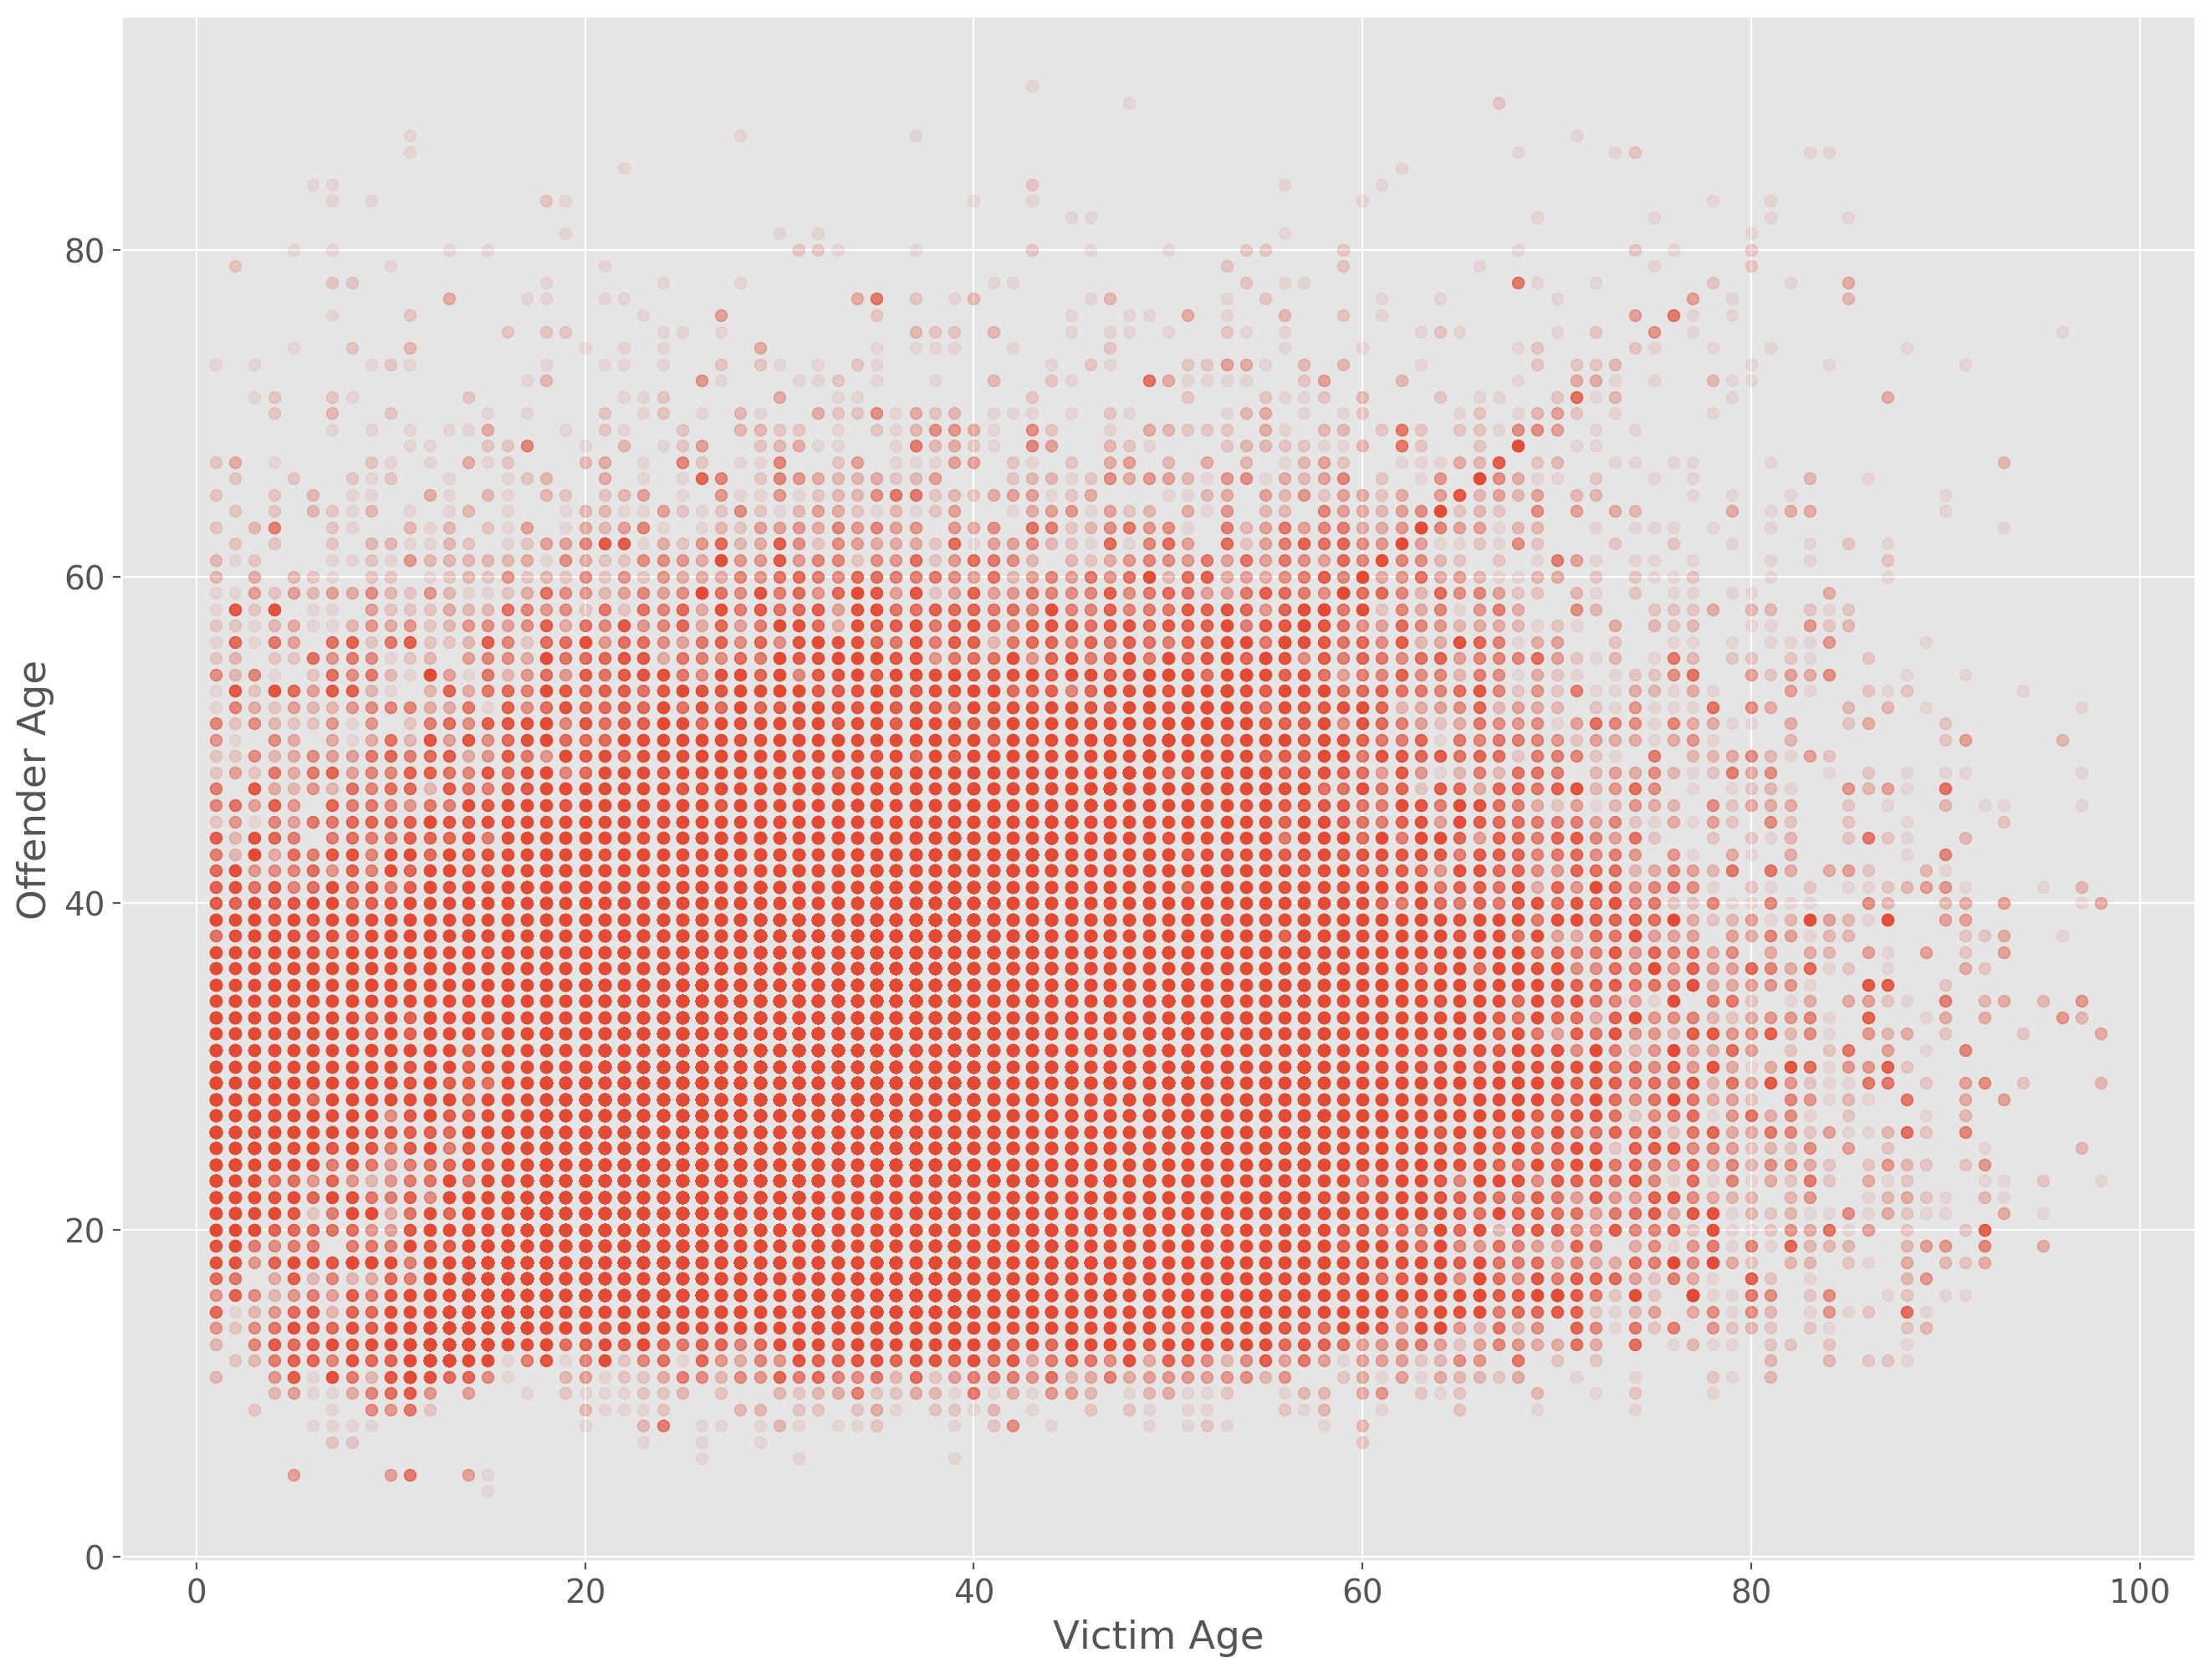

In [13]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=14)
plt.scatter(nibrs['victim_age'],nibrs['age'],s=25,alpha=0.1)
plt.xlabel("Victim Age")
plt.ylabel("Offender Age")
plt.show()

In [18]:
nibrs[['age','victim_age']].corr()

,age,victim_age
age,1.000000,0.242549
victim_age,0.242549,1.000000


When you use the "C()" category function within the formula, it automatically does 'one-hot' coding, aka dummy variables. For all categories of that variable, except one. That excluded category becomes the "reference" variable and is described by the intercept. Categoirical effects can be non-linear as there is nothing forcing the effect among categories to be linear.

Using 'multiply' (asterisk) within the regression formula will estimate interactions betwen two variables. It is literally multiplying the two, while maintaining the 'marginal' or main effects.

In [5]:
mod1 = ols(formula='age ~ victim_age + C(victim_sex) + C(victim_race)' ,data=nibrs).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2050.
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:16:24   Log-Likelihood:            -8.9764e+05
No. Observations:              235036   AIC:                         1.795e+06
Df Residuals:                  235027   BIC:                         1.795e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      25.7717      0.187    137.875      0.000      25.405      26.138
C(victim_sex)[T.M]                                             -1.8056      0.046    -39.048      0.000      -1.896      -1.715
C(victim_sex)[T.U]                                             -0.3966      0.165     -2.404      0.016      -0.720      -0.073
C(victim_race)[T.Asian]                                        -0.9752      0.223     -4.372      0.000      -1.412      -0.538
C(victim_race)[T.Black or African American]                    -0.7131      0.222     -3.217      0.001      -1.148      -0.279
C(victim_race)[T.Native Hawaiian or Other Pacific Islander]     2.3092      0.787      2.933      0.003       0.766       3.852
C(victim_race)[T.Unknown]                                      -1.1712      0.190     -6.157      0.000      -1.544      -0.798
C(victim_race)[T.White]                                        -0.9873      0.183     -5.396      0.000      -1.346      -0.629
victim_age                                                      0.1715      0.001    121.304      0.000       0.169       0.174
==============================================================================
Omnibus:                    18990.688   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24046.897
Skew:                           0.745   Prob(JB):                         0.00
Kurtosis:                       3.487   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Partial Regression plots will show you the estimated relationship between an independent variable and the dependent variable, accounting for the others. These plots can also be used to diagnose model issues.

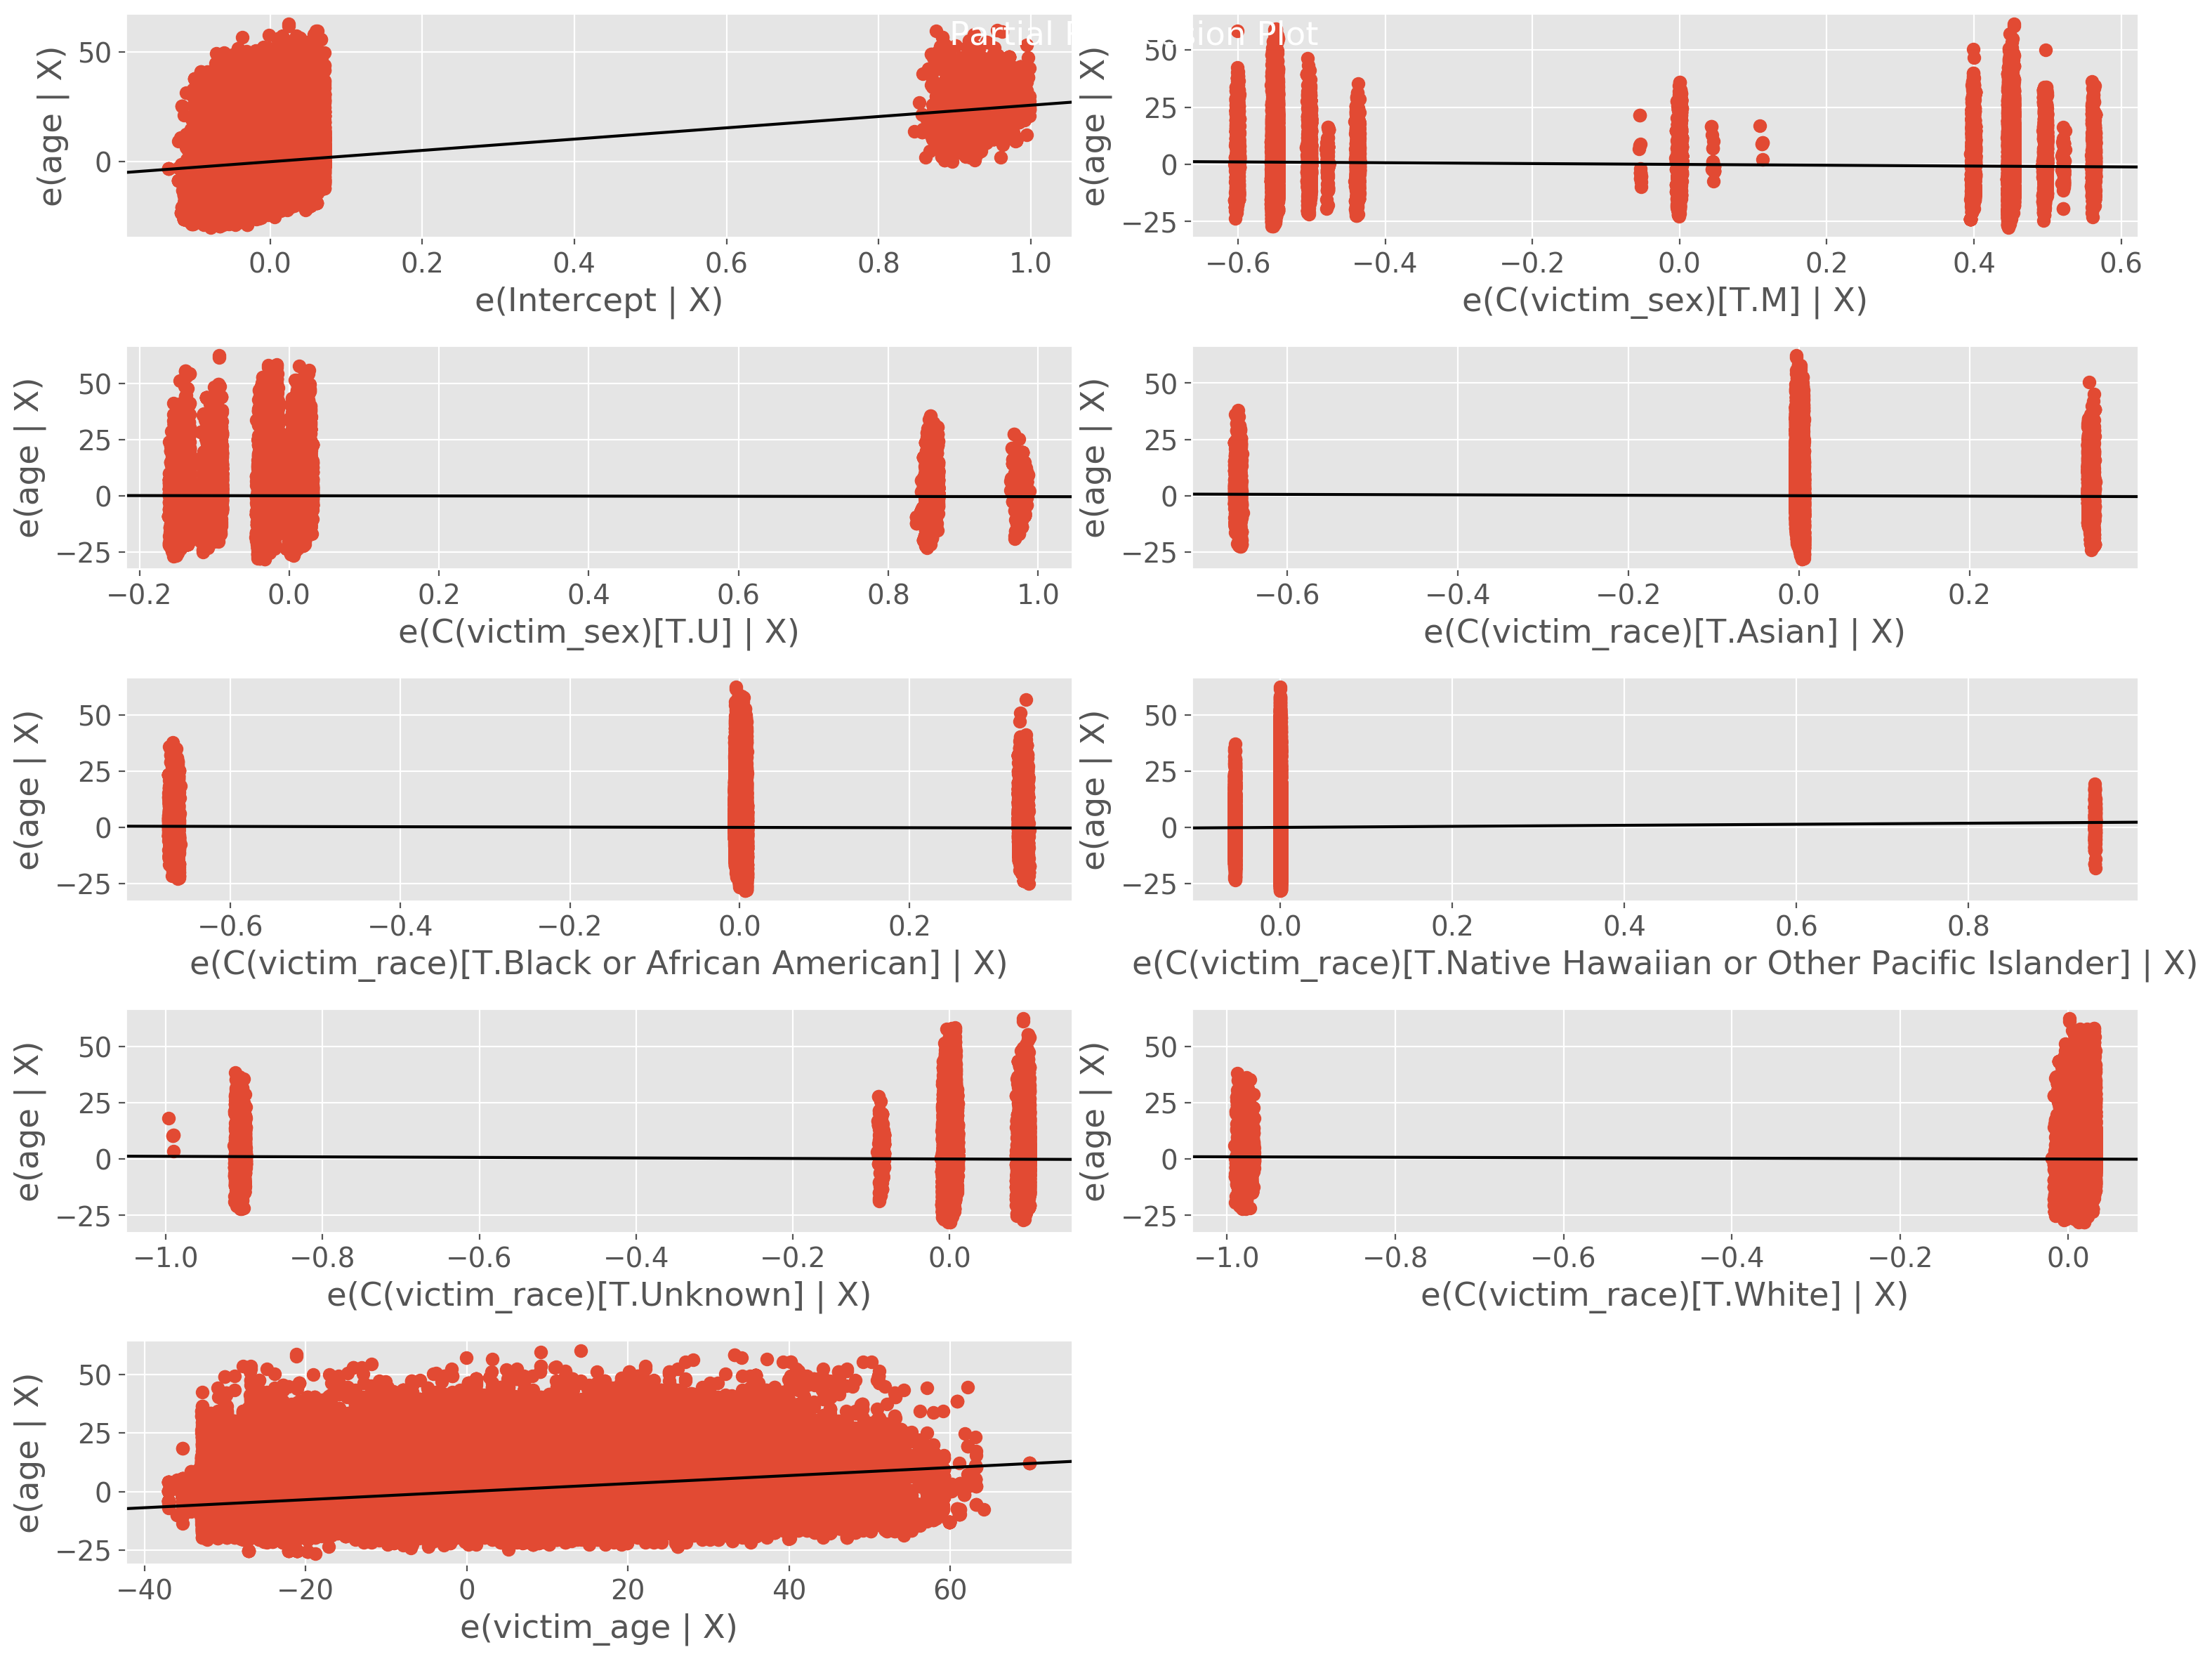

In [13]:
fig = sm.graphics.plot_partregress_grid(mod1)
fig.tight_layout(pad=1.0)

Go in to Statsmodels documentation for a lot of great graphical options to visualize data with respect to an estimate regression model. Some will help assess outliers and potential issues. (https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html)

#### Test Signficance of Categorical Variables with An ANOVA Test for Linear Models

In [9]:
from statsmodels.stats.anova import anova_lm

In [10]:
sigtest = anova_lm(mod1)
sigtest

,df,sum_sq,mean_sq,F,PR(>F)
C(victim_sex),2.0,1.878927e+05,9.394634e+04,772.789684,0.000000e+00
C(victim_race),5.0,1.684729e+04,3.369457e+03,27.716693,3.649450e-28
victim_age,1.0,1.788822e+06,1.788822e+06,14714.604370,0.000000e+00
Residual,235027.0,2.857171e+07,1.215678e+02,NaN,NaN


### How Do We Interpret Categorical Coefficients?

In [12]:
nibrs['victim_sex'].value_counts()

M    135998
F    107506
U     13360
Name: victim_sex, dtype: int64

In [11]:
nibrs['victim_age_cat'].value_counts()

Age in Years         235036
Unknown               19549
7-364 Days Old         1796
Over 98 Years Old       451
Under 24 Hours           23
1-6 Days Old              9
Name: victim_age_cat, dtype: int64

### Predict Estimated Age
What is the estimated offender age for a victim who is 29 years old, white, and male?

Let's do the math ourselves, first.

In [8]:
mod1.params

Intercept                                                      25.771663
C(victim_sex)[T.M]                                             -1.805618
C(victim_sex)[T.U]                                             -0.396645
C(victim_race)[T.Asian]                                        -0.975185
C(victim_race)[T.Black or African American]                    -0.713108
C(victim_race)[T.Native Hawaiian or Other Pacific Islander]     2.309153
C(victim_race)[T.Unknown]                                      -1.171231
C(victim_race)[T.White]                                        -0.987261
victim_age                                                      0.171542
dtype: float64

In [1]:
25.7717 - 1.8056 - 0.9873 + (0.1715 * 29)

27.952299999999997

In [11]:
wm29 = {'victim_age':29,'victim_sex':'M','victim_race':'White'}
mod1.predict(wm29)

0    27.953501
dtype: float64

#### Is there a dependency in effects (interaction) between victim age and victim sex?

In [8]:
from statsmodels.graphics.factorplots import interaction_plot

In [14]:
vaCat = pd.cut(nibrs['victim_age'],4)
vaCat.value_counts()

(25.25, 49.5]     111464
(0.903, 25.25]     84149
(49.5, 73.75]      35946
(73.75, 98.0]       3477
Name: victim_age, dtype: int64

[Text(0, 0, ' '),
 Text(0, 0, '(0-25.25]'),
 Text(0, 0, ' '),
 Text(0, 0, '(25.25,49.5]'),
 Text(0, 0, ' '),
 Text(0, 0, '(49.5,73.75]'),
 Text(0, 0, ' '),
 Text(0, 0, '(73.75,98]')]

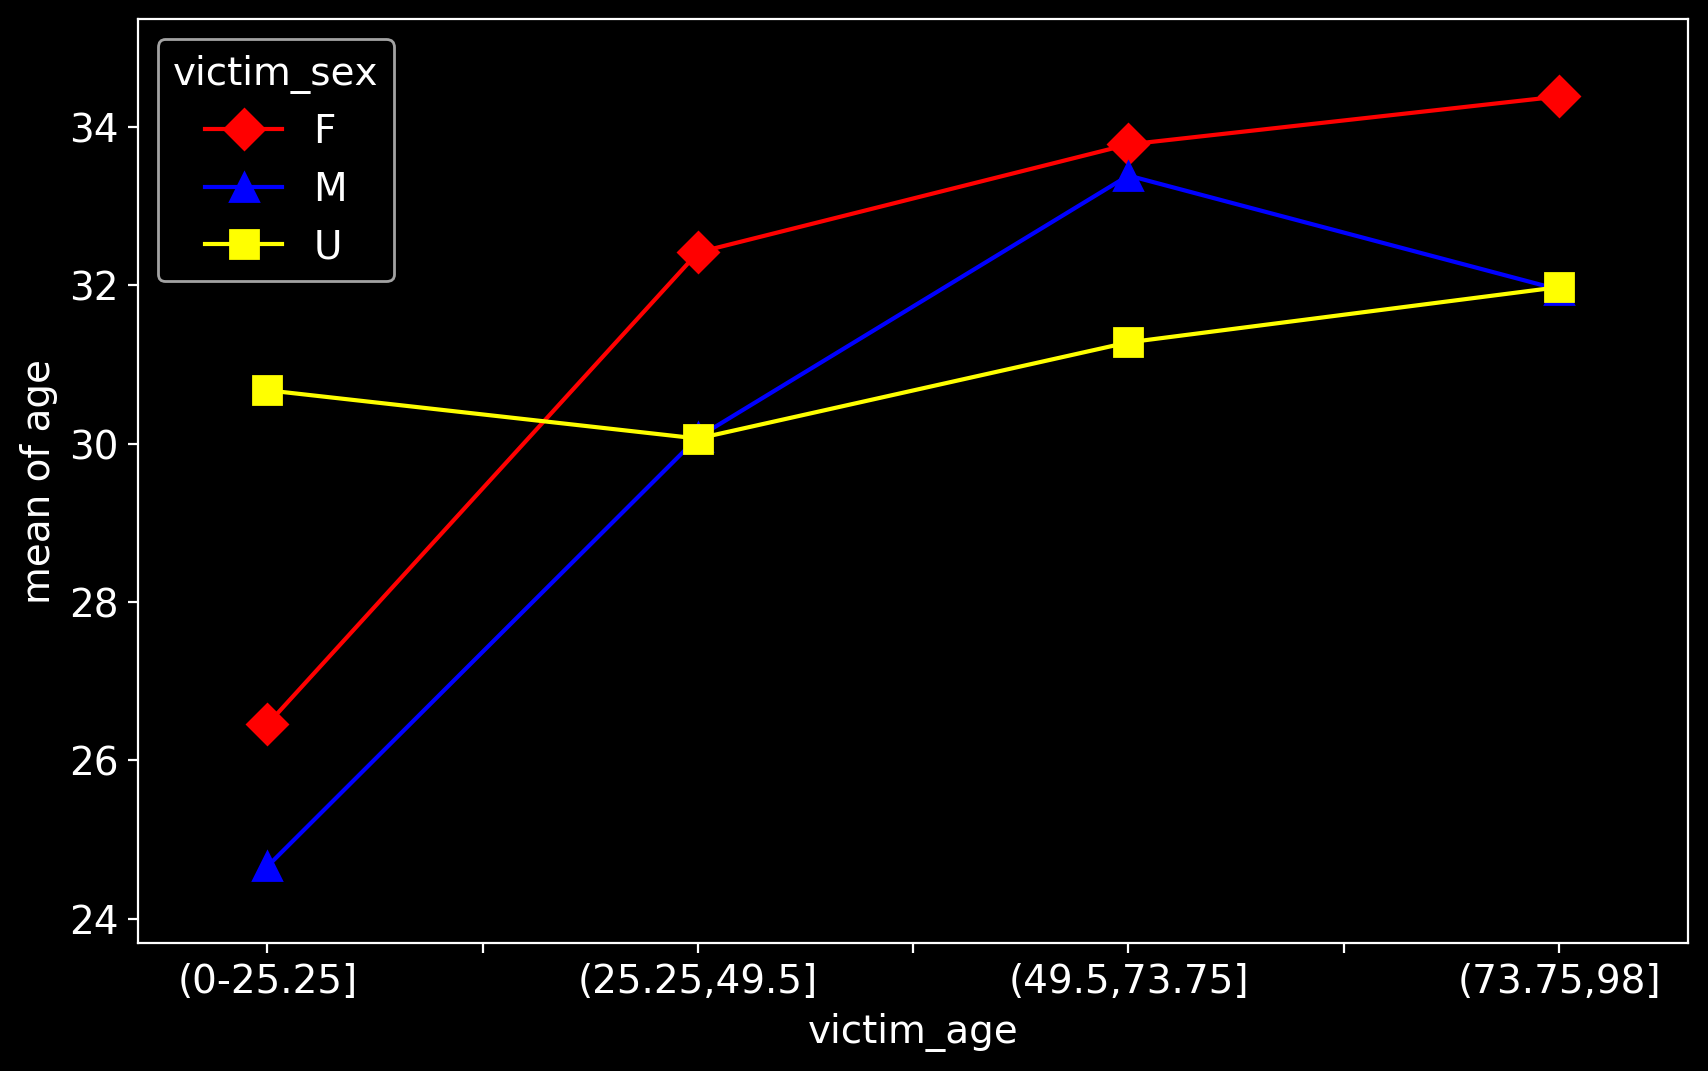

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
fig = interaction_plot(
    x=vaCat,
    trace=nibrs['victim_sex'],
    response=nibrs['age'],
    colors=["red", "blue","Yellow"],
    markers=["D","^","s"],
    ms=10,
    ax=ax,
)
ax.set_xticklabels([" ","(0-25.25]"," ","(25.25,49.5]"," ","(49.5,73.75]"," ","(73.75,98]"])

# Application Reflection Activity

A local police agency approaches you and wants to use this data to assist in their efforts.

1. How could you use this information to help? Specifically, what problem(s) could you help solve with this model? (Class Discussion)
2. Form a group and propose an alternative model. 
    1. Be prepared to discuss how your model is different and why it is better than the model we already used.
    2. Predict the offender age for a victim who is male, unkown race, age 21. 
    3. Predict the offender age for a victime who has unknown gender, race is "American Indian or Alaska Native', and age 43.
3. If you used this model to aid law enforcement, what is a potential drawback or problem you could cause by doing so?
    1. *Hint*: think about ethics.